# 시각화 (Visualization)

In [132]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import  matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris

In [133]:
ls cd data

 C 드라이브의 볼륨에는 이름이 없습니다.

파일을 찾을 수 없습니다.


 볼륨 일련 번호: A494-C8A8

 C:\myPyCode\ADP 디렉터리


 C:\myPyCode\ADP\data 디렉터리

2022-06-10  오후 04:38    <DIR>          .
2022-06-10  오후 04:38    <DIR>          ..
2019-09-21  오전 12:56             3,044 airquality.csv
2019-10-06  오전 07:12            14,870 Cars93.csv
2022-05-31  오후 08:07             2,518 cats.csv
2020-09-17  오전 04:36         1,103,280 Groceries_dataset.csv
2019-09-20  오전 01:54         7,296,418 house_price.csv
2022-06-02  오후 09:19             1,700 mtcars.csv
2022-04-17  오전 12:34             1,695 readme.txt
2022-06-01  오전 11:00            20,324 survey.csv
2022-04-09  오후 07:22            60,302 titanic_train.csv
               9개 파일           8,504,151 바이트
               2개 디렉터리  61,927,804,928 바이트 남음


In [134]:
cars93 = pd.read_csv('data/Cars93.csv',index_col='Unnamed: 0')
print('cars93.shape :',cars93.shape)

cars93.shape : (93, 27)


In [135]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print('iris_df.shape :',iris_df.shape)

iris_df.shape : (150, 4)


## 1. 산점도(Scatterplot, Regplot)

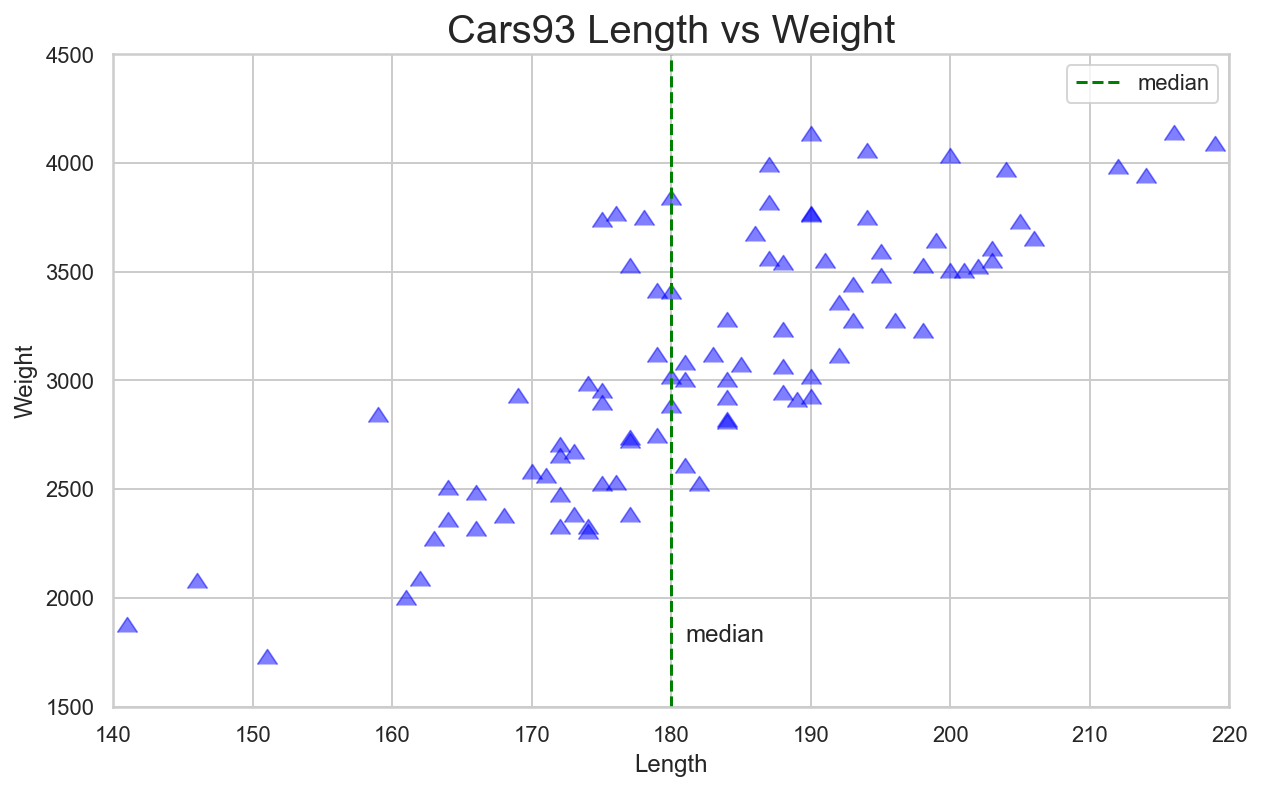

In [136]:
plt.figure(figsize=(10,6))

sns.scatterplot(cars93['Length'], cars93['Weight'], marker=10, s=100 , color='blue', alpha=0.5)
# style : 특성 별 다른 마커
# hue : 특성 별 다른 색상
# size : 특성 별 다른 크기
# marker : 마커 스타일
# s : 마커 크기
# color : 마커 색상
# alpha : 마커 투명도

plt.title('Cars93 Length vs Weight',size=20,y=1)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.xlim([140,220])
plt.ylim([1500,4500])

plt.axvline(180, color='green', linestyle='--', label='median')
plt.text(181,1800,'median')
plt.legend(loc='best')

plt.show()

(1500.0, 4500.0)

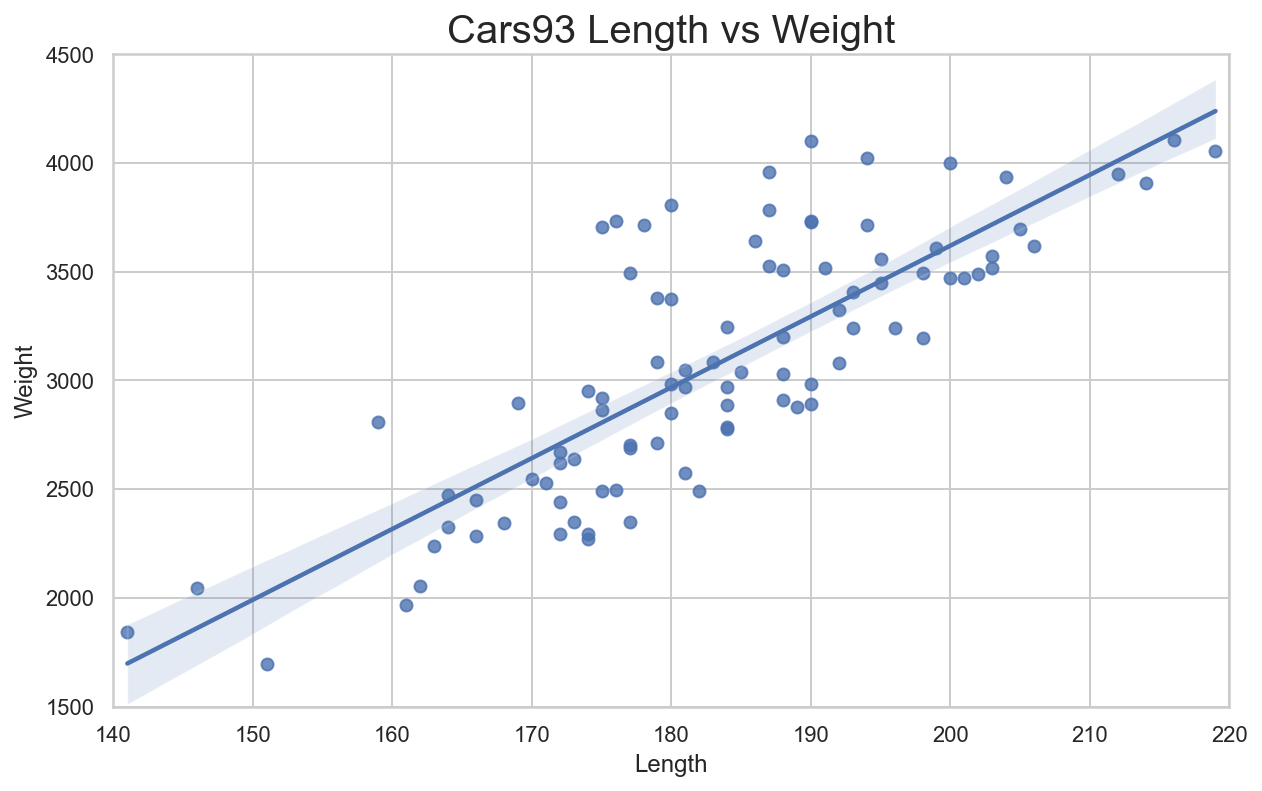

In [137]:
plt.figure(figsize=(10,6))

sns.regplot(cars93['Length'], cars93['Weight'])

plt.title('Cars93 Length vs Weight',size=20,y=1)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.xlim([140,220])
plt.ylim([1500,4500])

## 2. 선 그래프(Lineplot)

(1500.0, 4500.0)

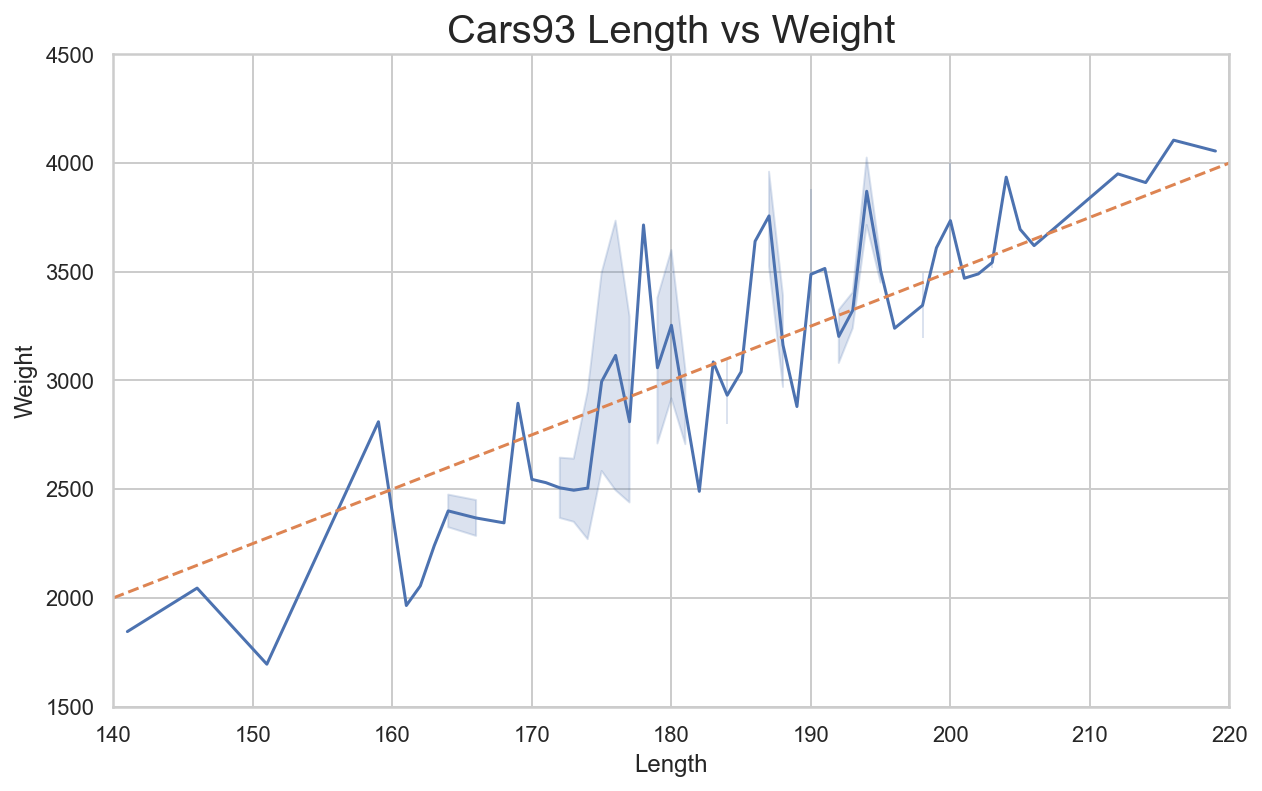

In [138]:
plt.figure(figsize=(10,6))

sns.lineplot(cars93['Length'], cars93['Weight'])
sns.lineplot([140,220],[2000,4000], linestyle='--')

plt.title('Cars93 Length vs Weight',size=20,y=1)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.xlim([140,220])
plt.ylim([1500,4500])

## 3. 막대그래프(Barplot, Countplot)

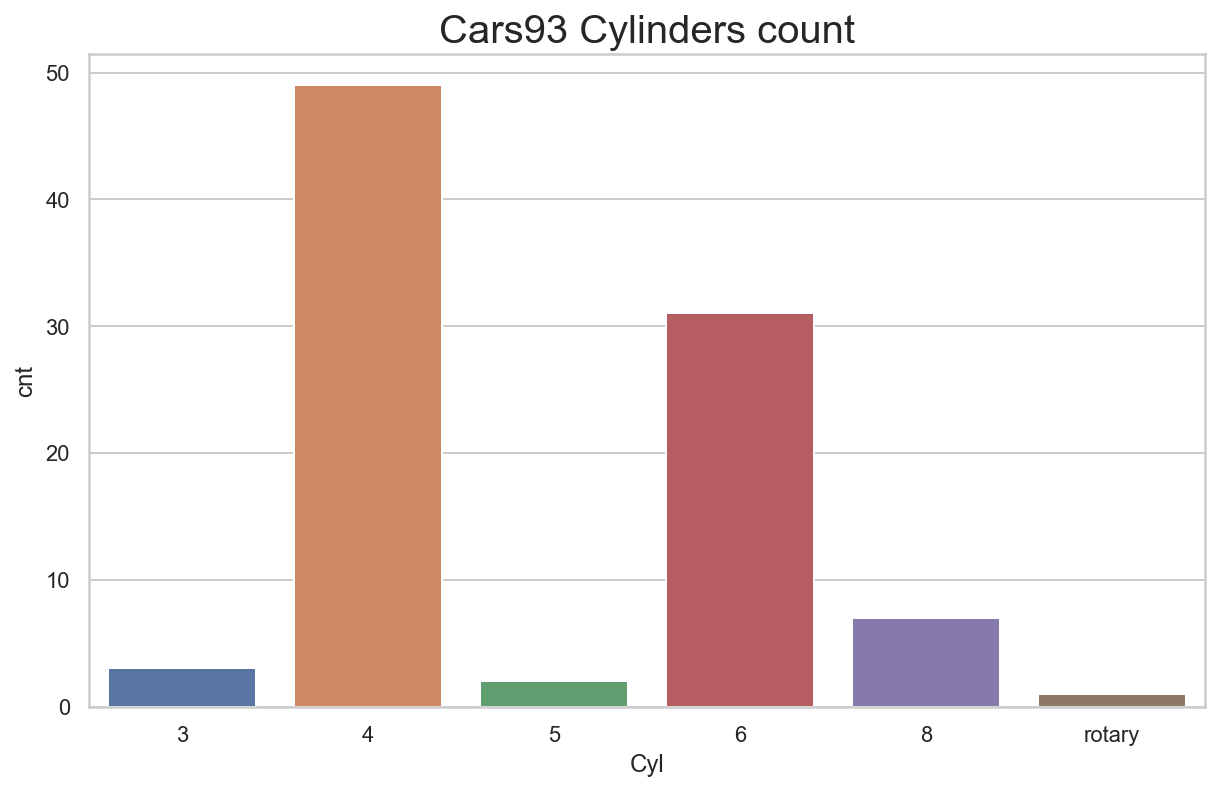

In [158]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'Cylinders', data= cars93, order=cars93['Cylinders'].value_counts().index.sort_values())

plt.title('Cars93 Cylinders count',size=20, y=1)
plt.xlabel('Cyl')
plt.ylabel('cnt')

plt.show()

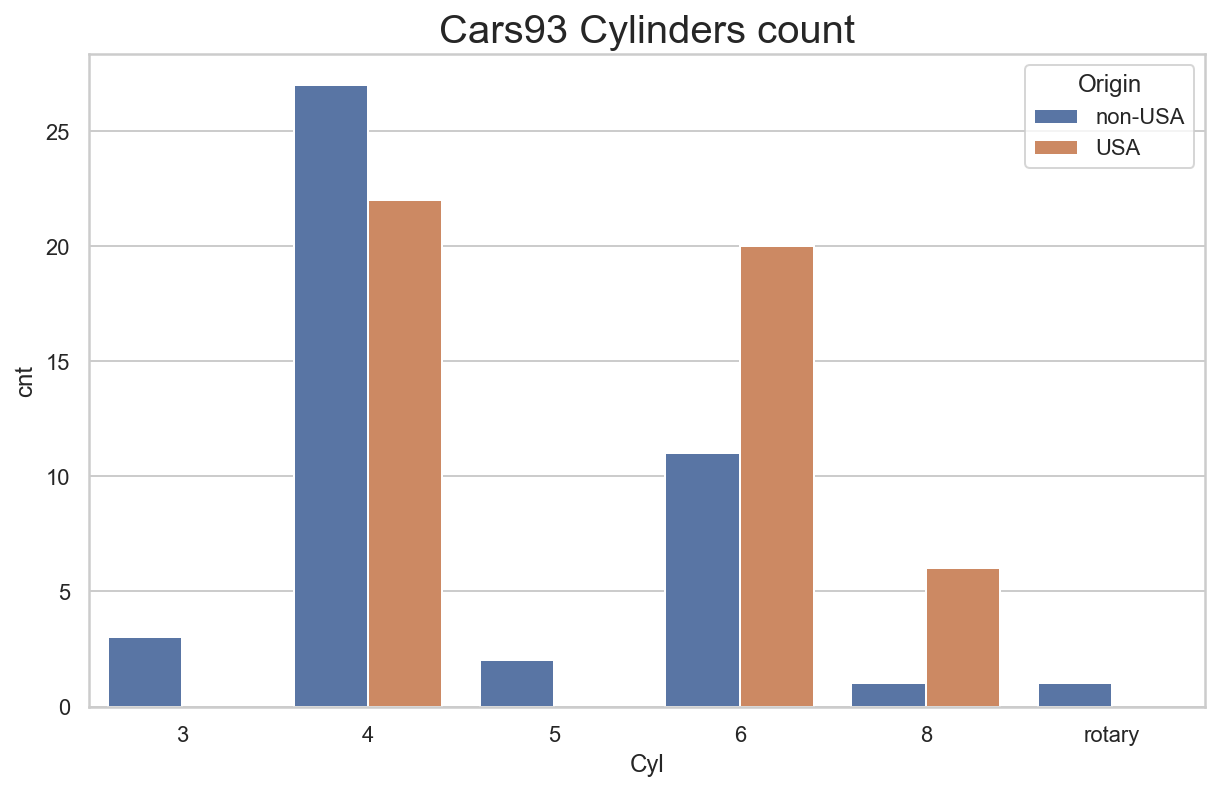

In [166]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'Cylinders', data= cars93, order=cars93['Cylinders'].value_counts().index.sort_values(), hue='Origin')

plt.title('Cars93 Cylinders count',size=20, y=1)
plt.xlabel('Cyl')
plt.ylabel('cnt')

plt.show()

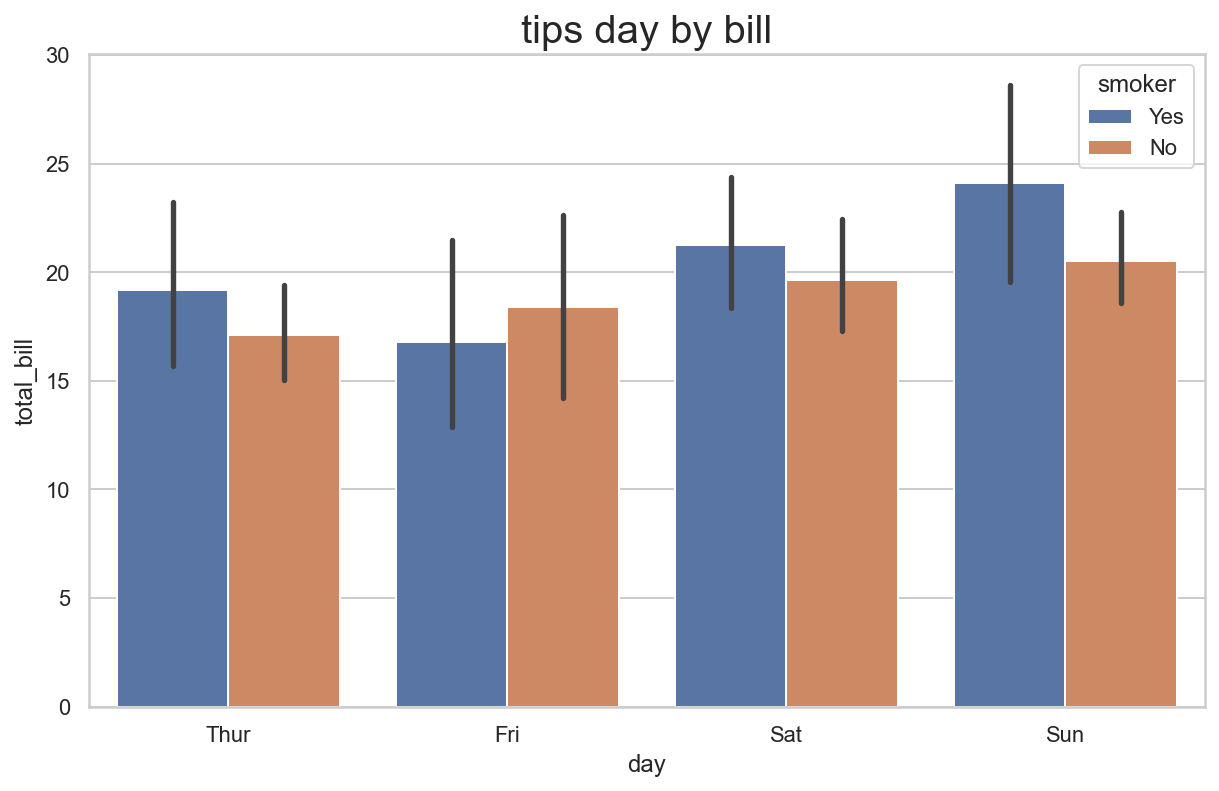

In [188]:
plt.figure(figsize=(10,6))

tips = sns.load_dataset("tips")
sns.barplot(x="day", y="total_bill", data=tips, hue='smoker')

plt.title('tips day by bill',size=20, y=1)
plt.xlabel('day')
plt.ylabel('total_bill')

plt.show()

<Figure size 720x432 with 0 Axes>

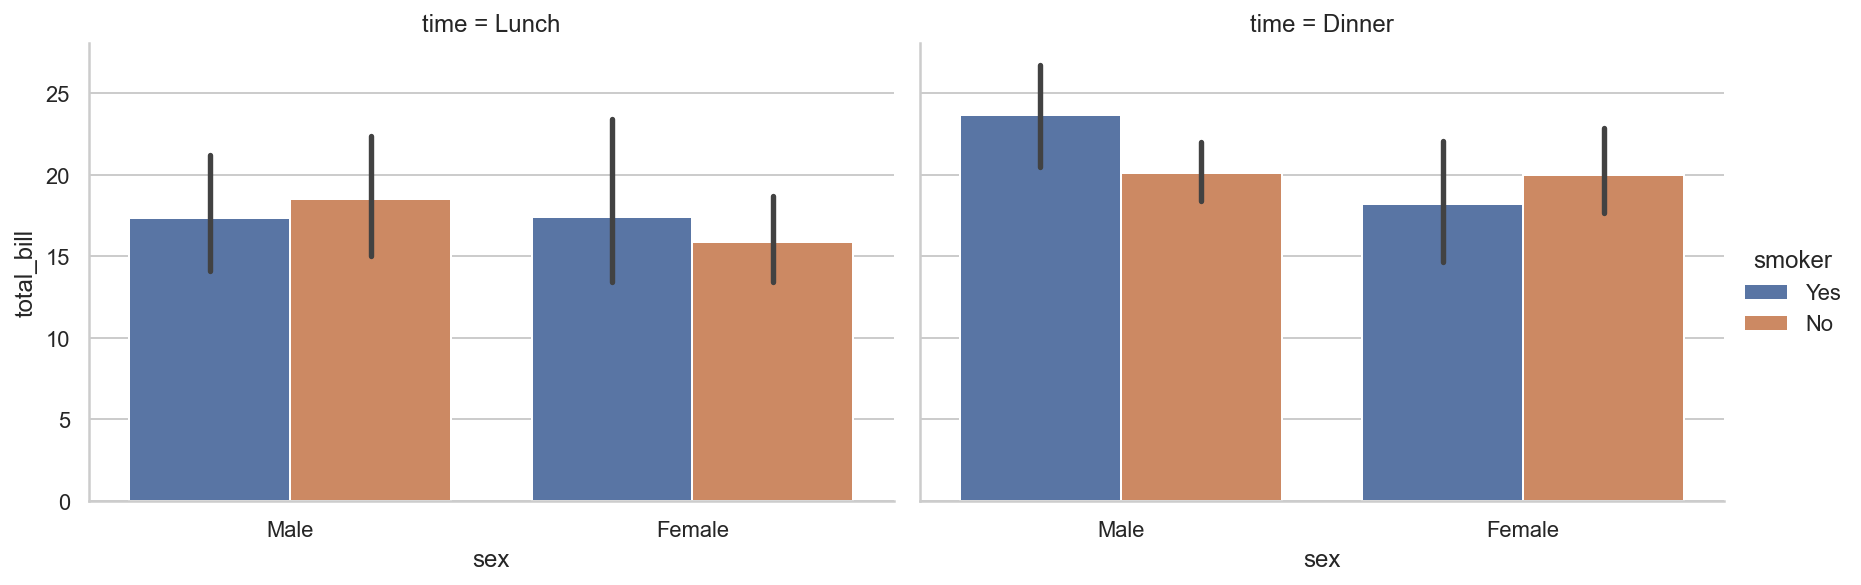

In [201]:
plt.figure(figsize=(10,6))

tips = sns.load_dataset("tips")
sns.catplot(x="sex", y="total_bill", data=tips, hue='smoker', kind='bar', col='time',
           height = 4, aspect=1.5)
plt.show()

## 4. 히스토그램 (Histplot, Distplot)

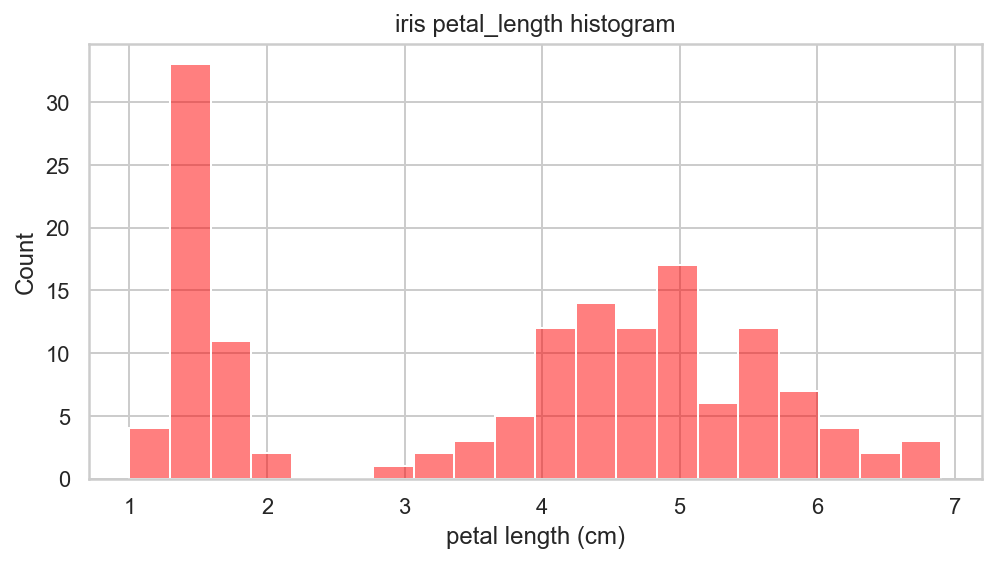

In [231]:
plt.figure(figsize=(8,4))
plt.title('iris petal_length histogram')
sns.histplot(iris_df['petal length (cm)'], bins=20, color='red', alpha=0.5)
plt.show()

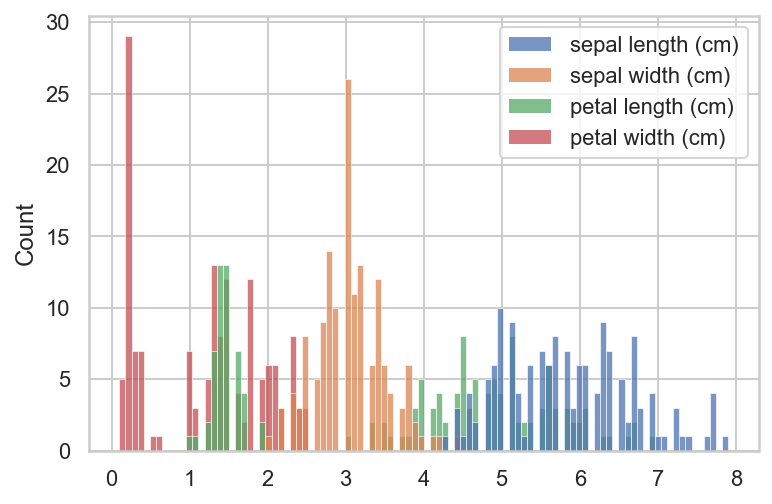

In [229]:
sns.histplot(iris_df,bins=100)
plt.show()

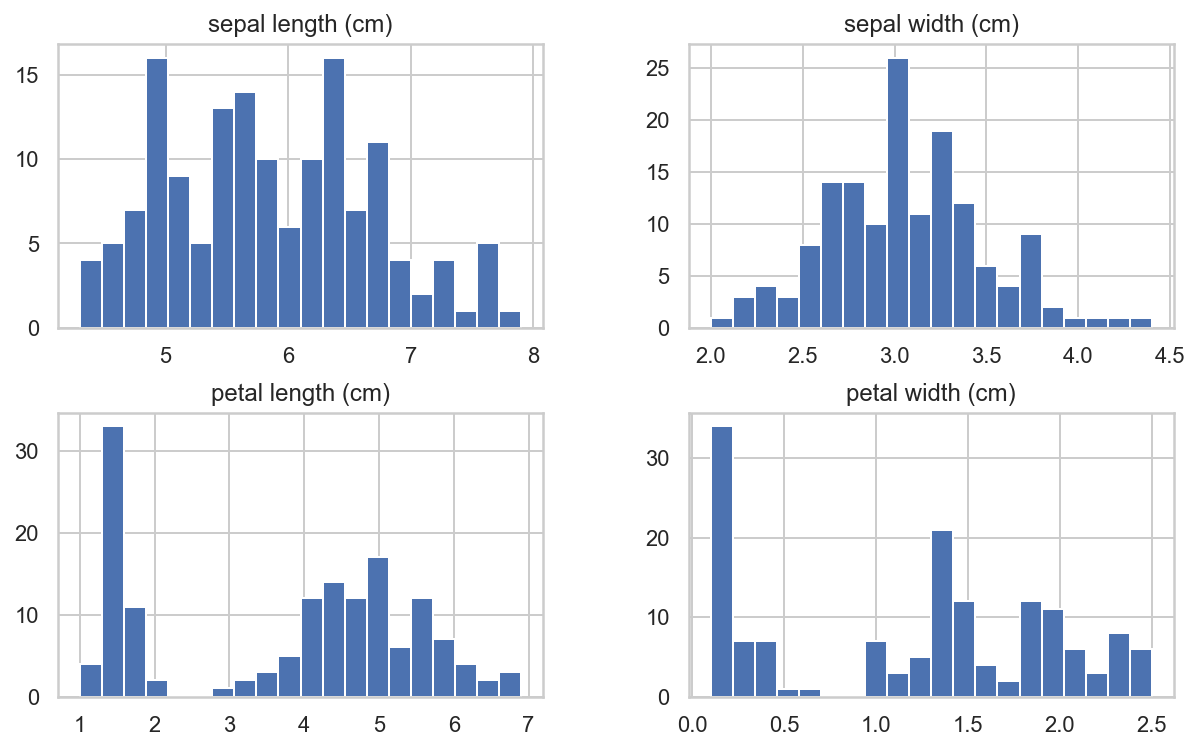

In [230]:
iris_df.hist(bins=20,figsize=(10,6))
plt.show()

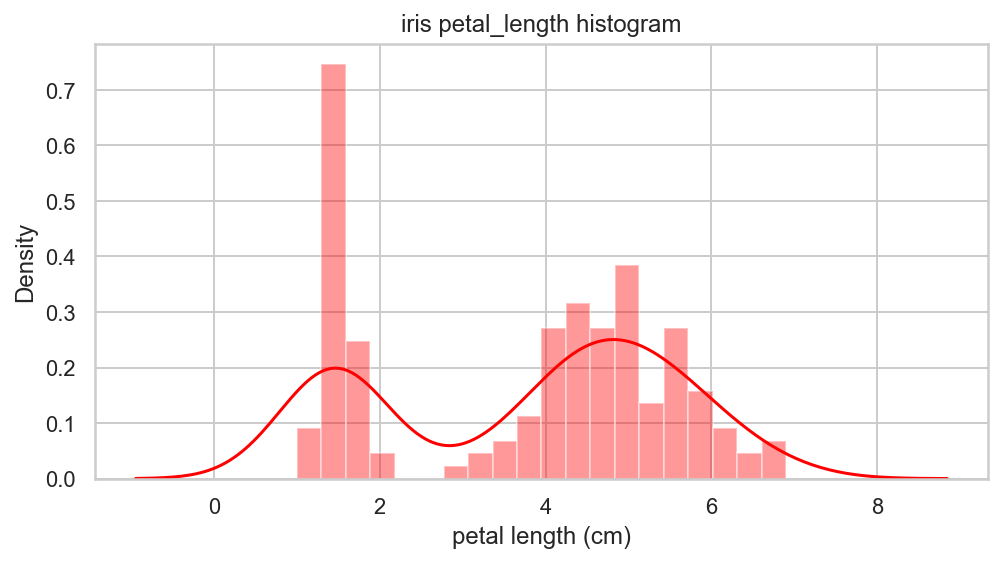

In [232]:
plt.figure(figsize=(8,4))
plt.title('iris petal_length histogram')
sns.distplot(iris_df['petal length (cm)'], bins=20, color='red')
plt.show()

## 5. 파이 차트(pieplot)

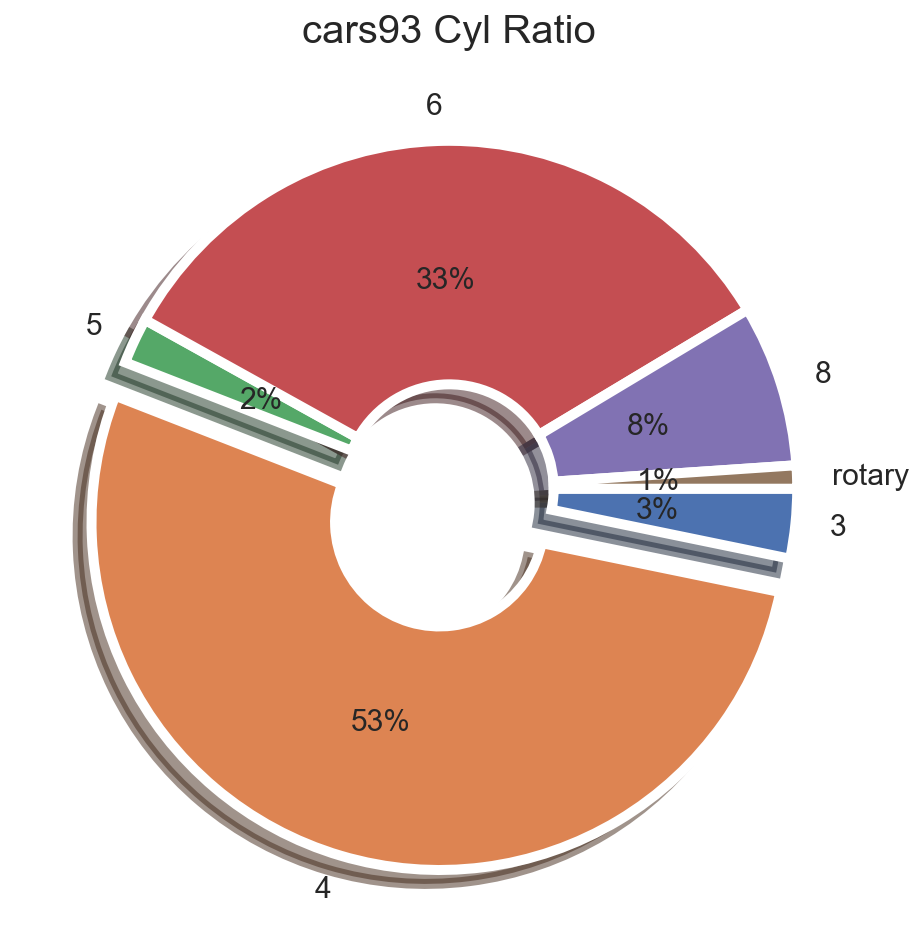

In [260]:
cnt_cyl = cars93['Cylinders'].value_counts().sort_index()
explode = [0, 0.1, 0, 0, 0,0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(8,8))
plt.title('cars93 Cyl Ratio',size=20)
plt.pie(cnt_cyl.values, labels=cnt_cyl.index,autopct='%.0f%%', shadow=True, explode = explode,
       startangle=0, counterclock=False, textprops={'fontsize': 15}, wedgeprops=wedgeprops)
plt.show()

## 6. 산점도 행렬 (PairPlot)

In [266]:
iris_df['species'] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


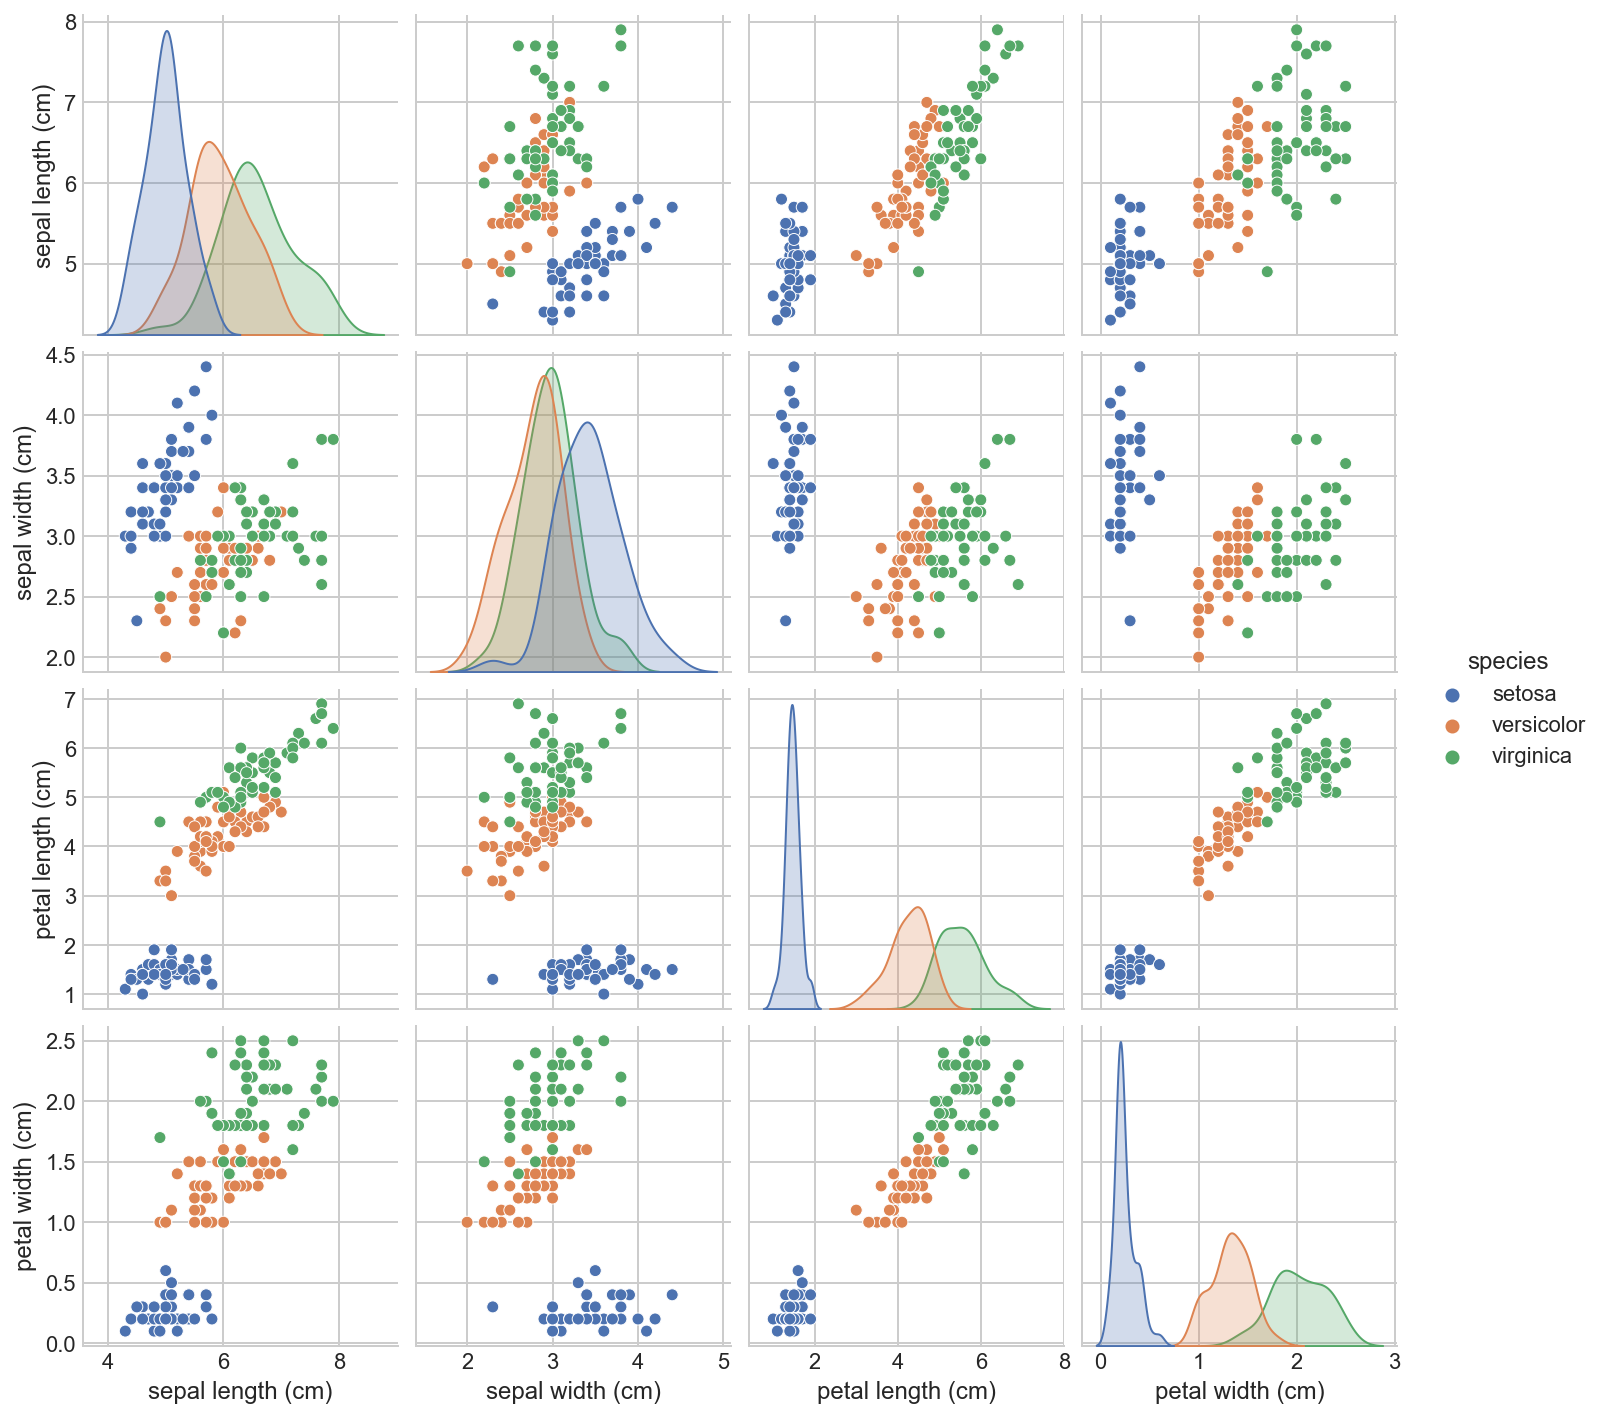

In [267]:
_ = sns.pairplot(iris_df, hue='species')

## 7. Subplot

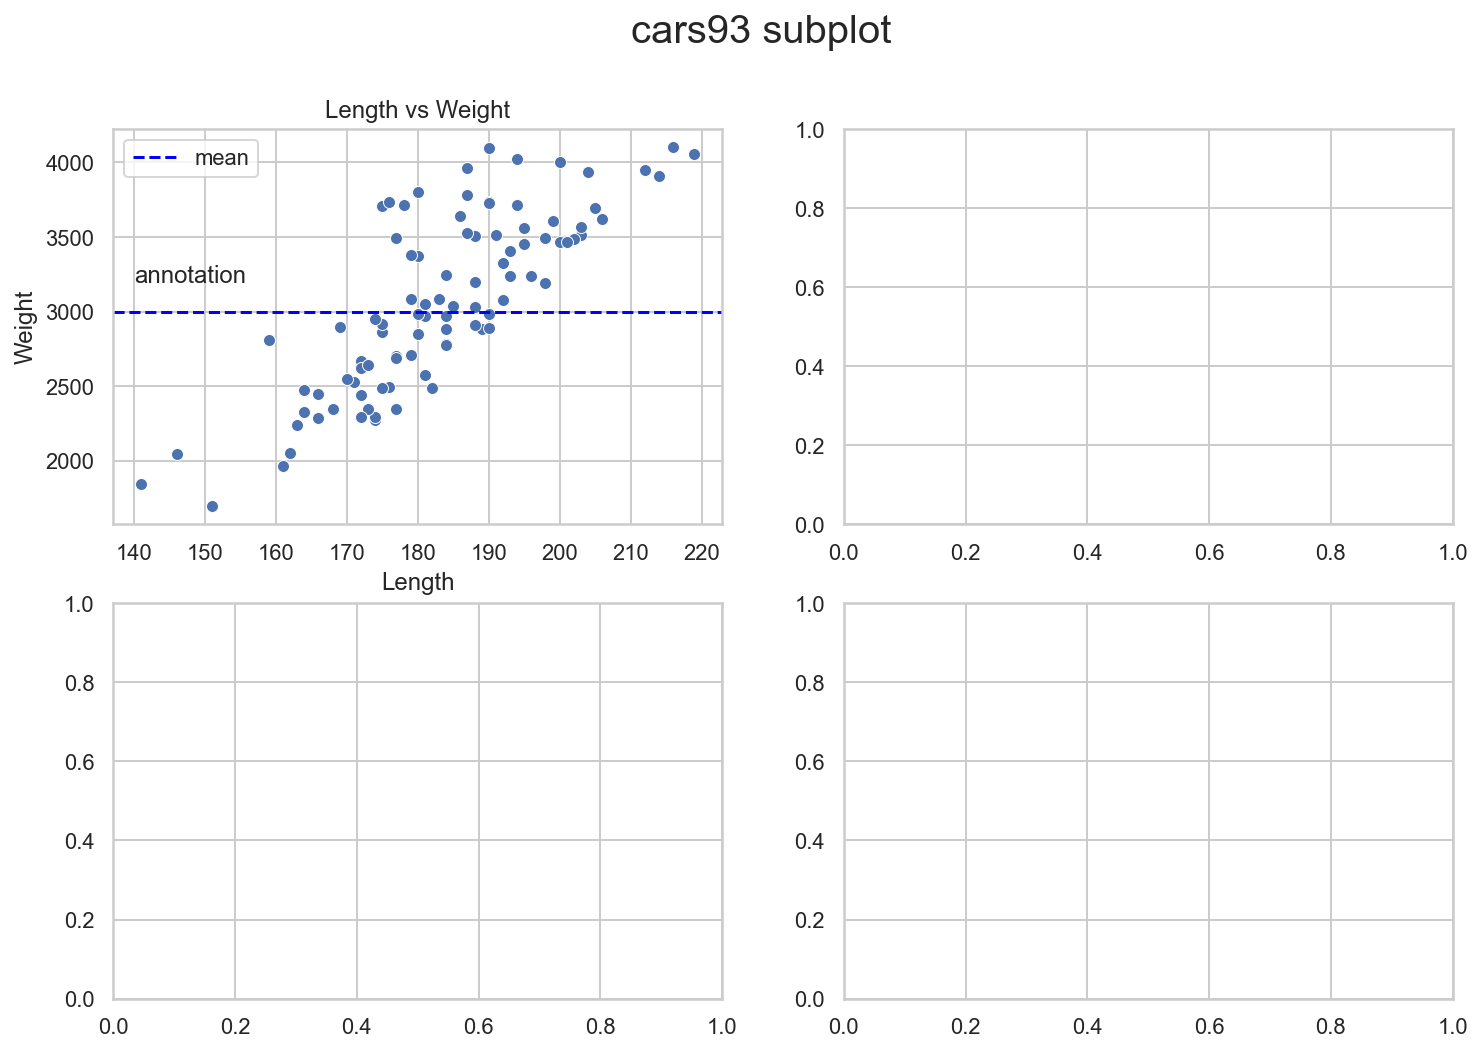

In [141]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

plt.suptitle('cars93 subplot', size=20)
sns.scatterplot(cars93['Length'],cars93['Weight'],ax=ax[0,0])
ax[0,0].set_title('Length vs Weight')
ax[0,0].axhline(3000,label='mean',linestyle='--',color='blue')
ax[0,0].legend(loc='best')
ax[0,0].text(140,3200,'annotation')
ax[0,0].set_xlabel('Length')
ax[0,0].set_ylabel('Weight')

plt.show()